This project focuses on credit classification. The main objective is to develop a predictive model to categorize credit applicants into different risk levels. By analyzing various features and historical data of applicants, the model aims to assist financial institutions in evaluating credit applications more effectively. The classification goal is to categorize credit scores into three main groups: Standard, Poor, and Good. The project aims to improve the efficiency and accuracy of the credit approval process, reduce default risks, and optimize the overall credit management strategy.

Columns Discreption

ID: Unique identifier for each record in the dataset.

Customer_ID: Unique identifier for each customer.

Month: Month of the data record.

Name: Customer's name.

Age: Age of the customer.

SSN: Social Security Number or a unique identification number.

Occupation: Customer's occupation or job title.

Annual_Income: Annual income of the customer.

Monthly_Inhand_Salary: Net monthly income available to the customer.

Num_Bank_Accounts: Number of bank accounts the customer holds.

Num_Credit_Card: Number of credit cards owned by the customer.

Interest_Rate: Interest rate associated with financial transactions.

Num_of_Loan: Number of loans the customer has.

Type_of_Loan: Type or category of the loan.

Delay_from_due_date: Delay in payment from the due date.

Num_of_Delayed_Payment: Number of delayed payments.

Changed_Credit_Limit: Any recent changes in the customer's credit limit.

Num_Credit_Inquiries: Number of credit inquiries made by the customer.

Credit_Mix: Variety of credit types in the customer's financial profile.

Outstanding_Debt: Total outstanding debt of the customer.

Credit_Utilization_Ratio: Ratio of credit used to credit available.

Credit_History_Age: Age of the customer's credit history.

Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.

Total_EMI_per_month: Total Equated Monthly Installments paid by the customer.

Amount_invested_monthly: Amount invested by the customer monthly.

Payment_Behaviour: General behavior regarding payments.

Monthly_Balance: Monthly balance in the customer's financial accounts.

Credit_Score: Numerical representation of the customer's creditworthiness.

Importing Libraries

In [ ]:
!pip install datasist

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectFromModel
from datasist.structdata import detect_outliers
from sklearn.model_selection import cross_val_score, cross_val_predict
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.multiclass import OneVsOneClassifier
import xgboost as xgb
from xgboost import plot_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score , classification_report , precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

Loading the Data

In [ ]:
df_train = pd.read_csv('train.csv' , low_memory=False)
df_test = pd.read_csv('test.csv')
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Exploratory Data Analysis (EDA)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Cleaning the Data

In [ ]:
df_train['Annual_Income'][66]

'114838.41_'

In [ ]:
df_train['Num_of_Delayed_Payment'][11]

'3_'

In [ ]:
def remove_(value):
  temp_str = str(value).strip('_')
  if temp_str == '':
    return np.nan
  try:
    return float(temp_str)
  except ValueError:
    return np.nan

defected_cols = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for col in defected_cols:
  df_train[col] = df_train[col].apply(remove_)
  df_test[col] = df_test[col].apply(remove_)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [ ]:
for col in df_train[['Age', 'Num_of_Loan']]:
    df_train[col]=df_train[col].apply(lambda x : abs(x) if x < 0 else x )
    df_test[col]=df_test[col].apply(lambda x : abs(x) if x < 0 else x )

In [ ]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [ ]:
df_train[df_train['Age'] > 100]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
56,0x1656,CUS_0x5407,January,Annk,7580.0,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
113,0x16ab,CUS_0xff4,February,NaN,500.0,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,181.0,965-46-2491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,0x1749,CUS_0x3edc,April,Williamso,995.0,663-16-3845,Accountant,43070.24,3622.186667,3,...,Standard,1233.10,24.331772,19 Years and 5 Months,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263.0,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.713580,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500.0,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.076293,Low_spent_Large_value_payments,337.130290,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342.0,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.376320,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500.0,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,520.662207,Standard


In [ ]:
df_train.drop(df_train[df_train['Age'] > 100].index, inplace=True)

In [ ]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97224.000000,9.722400e+04,82627.000000,97224.000000,97224.000000,97224.000000,97224.000000,97224.000000,90400.000000,95187.000000,95318.000000,97224.000000,97224.000000,97224.000000,92880.000000,9.604500e+04
mean,33.323274,1.768414e+05,4195.049948,17.128106,22.447503,72.593259,10.713507,21.079199,30.853805,10.389471,27.853585,1426.288628,32.284832,1396.541267,636.362616,-3.123536e+22
std,10.778909,1.432682e+06,3182.903382,117.687107,128.848573,467.279983,61.375653,14.858237,225.319273,6.790566,193.574120,1155.436436,5.117826,8279.887837,2040.539802,3.226596e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.480000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.946292e+04,1626.594167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.340000,3.000000,566.050000,28.052588,30.338701,74.531330,2.700832e+02
50%,33.000000,3.757918e+04,3095.978333,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.080000,32.306296,69.272824,136.013159,3.366478e+02
75%,42.000000,7.281540e+04,5957.715000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,1945.680000,36.499460,161.405543,266.070982,4.699438e+02
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


Removing Redundant Columns

In [ ]:
df_train.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'], axis=1 , inplace=True)
df_test.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'], axis=1, inplace=True)

In [ ]:
(df_train.isna().sum()/df_train.shape[0]) * 100

,0
Month,0.000000
Age,0.000000
Occupation,0.000000
Annual_Income,0.000000
Monthly_Inhand_Salary,15.013783
Num_Bank_Accounts,0.000000
Num_Credit_Card,0.000000
Interest_Rate,0.000000
Num_of_Loan,0.000000
Delay_from_due_date,0.000000


In [ ]:
num_cols = df_train.select_dtypes(include=['int32', 'int64', 'float32', 'float64'])
category_cols = df_train.select_dtypes(exclude=['int32', 'int64', 'float32', 'float64'])

In [ ]:
for col in category_cols:
  print(f'{col}: ')
  print('#' * 90)
  print(df_train[col].value_counts())
  print('\n')

Month: 
##########################################################################################
Month
August      12181
March       12169
July        12168
May         12164
June        12162
April       12134
January     12125
February    12121
Name: count, dtype: int64


Occupation: 
##########################################################################################
Occupation
_______          6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: count, dtype: int64


Credit_Mix: 
##########################################################################################
Credit_Mix
Standard    35517
Good        23614
_           19633
Bad         18460
Name: count, dtype: int64


Payment_of_Mi

In [ ]:
df_train[df_train['Occupation'] == '_______']

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,January,28.0,_______,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
16,January,34.0,_______,143162.64,12187.220000,1,5,8,3.0,5,...,3.0,Good,1303.01,28.616735,No,246.992319,168.413703,!@9#%8,1043.315978,Good
18,March,34.0,_______,143162.64,NaN,1,5,8,3.0,8,...,NaN,Good,1303.01,26.519815,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367,Good
20,May,34.0,_______,143162.64,12187.220000,1,5,8,3.0,10,...,3.0,Good,1303.01,31.376150,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
29,June,55.0,_______,30689.89,2612.490833,2,5,4,1.0,5,...,4.0,_,632.46,27.445422,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912,January,54.0,_______,20059.98,1523.665000,8,5,12,4.0,25,...,3.0,Good,909.01,30.568185,No,6980.000000,151.214086,Low_spent_Medium_value_payments,236.075587,Poor
99920,January,37.0,_______,139664.96,11777.746667,3,6,12,4.0,14,...,8.0,_,365.66,31.043048,Yes,423.731016,282.782346,High_spent_Large_value_payments,711.261305,Standard
99935,August,38.0,_______,15319.65,1460.637500,6,7,15,4.0,54,...,6.0,Bad,1453.61,34.557510,Yes,28.182033,191.877779,Low_spent_Small_value_payments,216.003938,Poor
99943,August,48.0,_______,22620.79,NaN,6,2,9,0.0,27,...,2.0,_,642.46,34.026427,No,0.000000,205.217280,Low_spent_Small_value_payments,256.989303,Poor


In [ ]:
df_train['Occupation'] = df_train['Occupation'].apply(lambda x: 'Other' if x == '_______' else x)
df_test['Occupation'] = df_test['Occupation'].apply(lambda x: 'Other' if x == '_______' else x)

In [ ]:
df_train['Occupation'].value_counts()

,count
Occupation,
Other,6873
Lawyer,6389
Architect,6175
Engineer,6172
Scientist,6113
Accountant,6110
Mechanic,6099
Media_Manager,6068
Teacher,6049


In [ ]:
pd.DataFrame(df_train.groupby('Credit_Mix')['Credit_Score'].value_counts())

count
Credit_Mix Credit_Score       
Bad        Poor          11085
           Standard       7093
           Good            282
Good       Good          11489
           Standard       8363
           Poor           3762
Standard   Standard      25871
           Poor           7647
           Good           1999
_          Standard      10397
           Poor           5711
           Good           3525

In [ ]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].apply(lambda x: 'Standard' if x == '_' else x)
df_test['Credit_Mix'] = df_test['Credit_Mix'].apply(lambda x: 'Standard' if x == '_' else x)

In [ ]:
df_train['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,55150
Good,23614
Bad,18460


In [ ]:
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].apply(lambda x : 'Low_spent_Small_value_payments' if x == '!@9#%8' else x)
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].apply(lambda x : 'Low_spent_Small_value_payments' if x == '!@9#%8' else x)

In [ ]:
df_train['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,32216
High_spent_Medium_value_payments,17040
Low_spent_Medium_value_payments,13475
High_spent_Large_value_payments,13332
High_spent_Small_value_payments,11033
Low_spent_Large_value_payments,10128


In [ ]:
df_train['Payment_of_Min_Amount']= df_train['Payment_of_Min_Amount'].apply(lambda x : 'No' if x == 'NM' else x)
df_test['Payment_of_Min_Amount']= df_test['Payment_of_Min_Amount'].apply(lambda x : 'No' if x == 'NM' else x)

In [ ]:
df_train['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,50911
No,46313


Univariate Analysis

In [ ]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [ ]:
df_good = df_train[df_train['Credit_Score'] == 'Good']
df_standard = df_train[df_train['Credit_Score'] == 'Standard']
df_bad = df_train[df_train['Credit_Score'] == 'Poor']

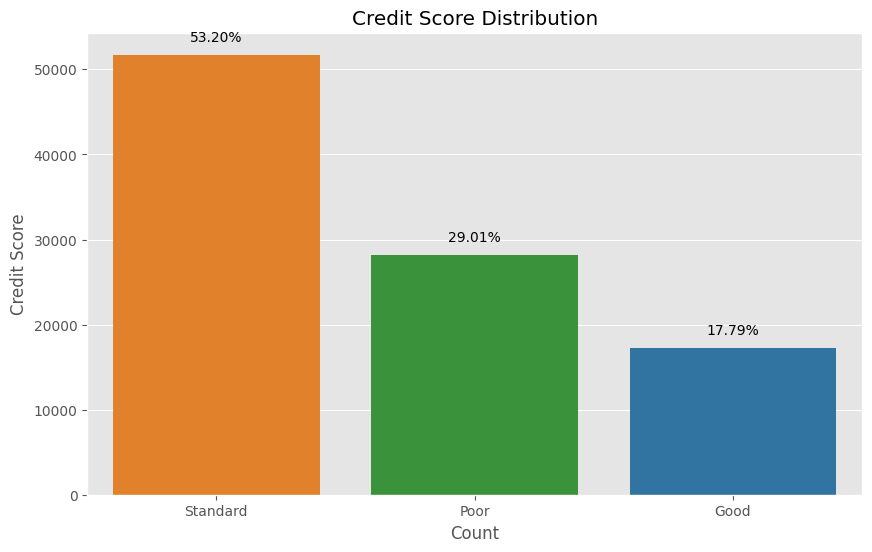

In [ ]:
credit_score_values = df_train['Credit_Score'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x = 'Credit_Score', palette='tab10', order=credit_score_values.index, hue='Credit_Score', legend=False)
plt.title('Credit Score Distribution')
plt.ylabel('Credit Score')
plt.xlabel('Count')

total = len(df_train)
for i in range(credit_score_values.shape[0]):
  count = credit_score_values.iloc[i]
  percentage = '{:.2f}%'.format(100 * count / total)
  x = i
  y = count + 2000
  ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

plt.show()

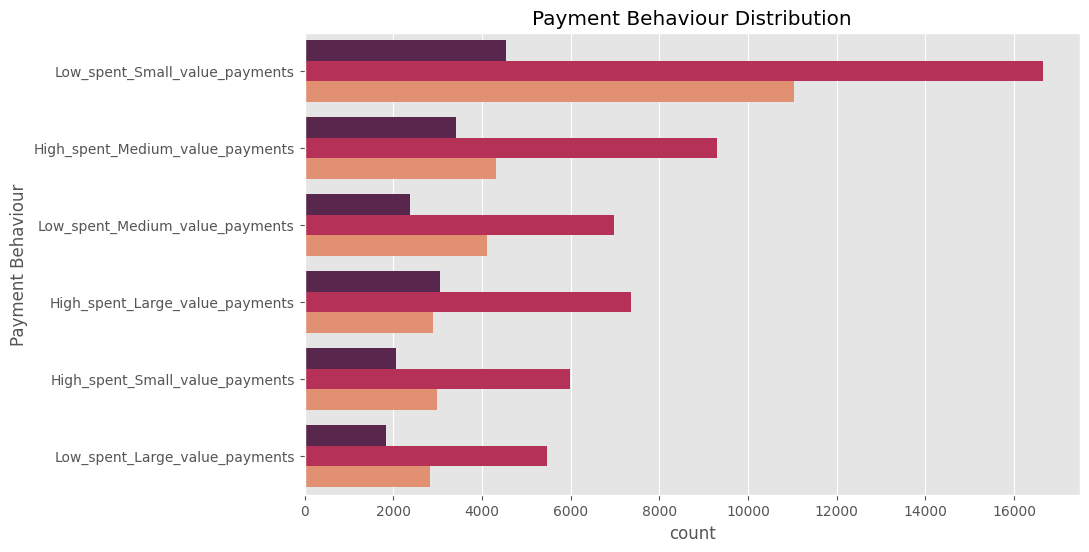

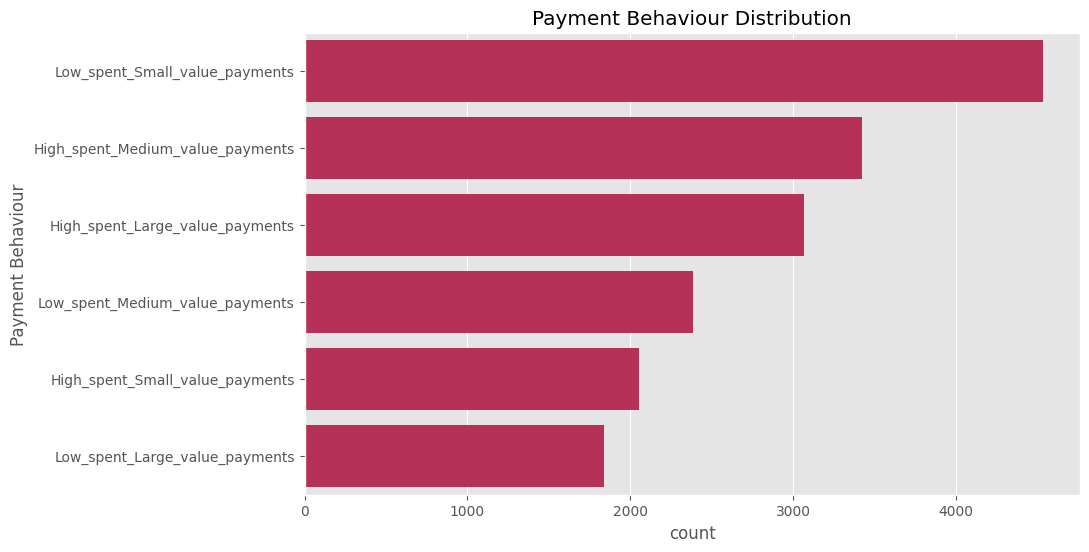

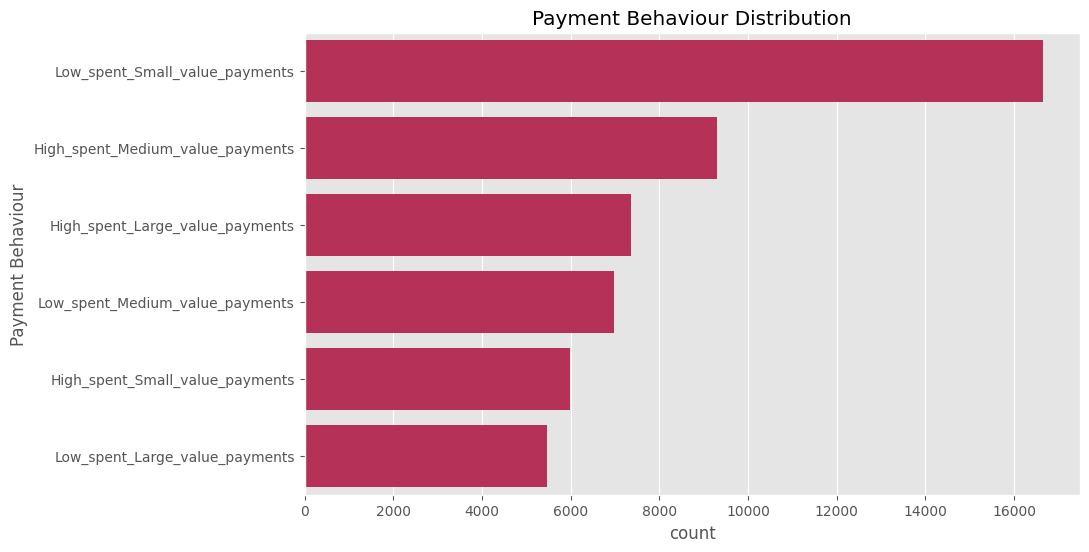

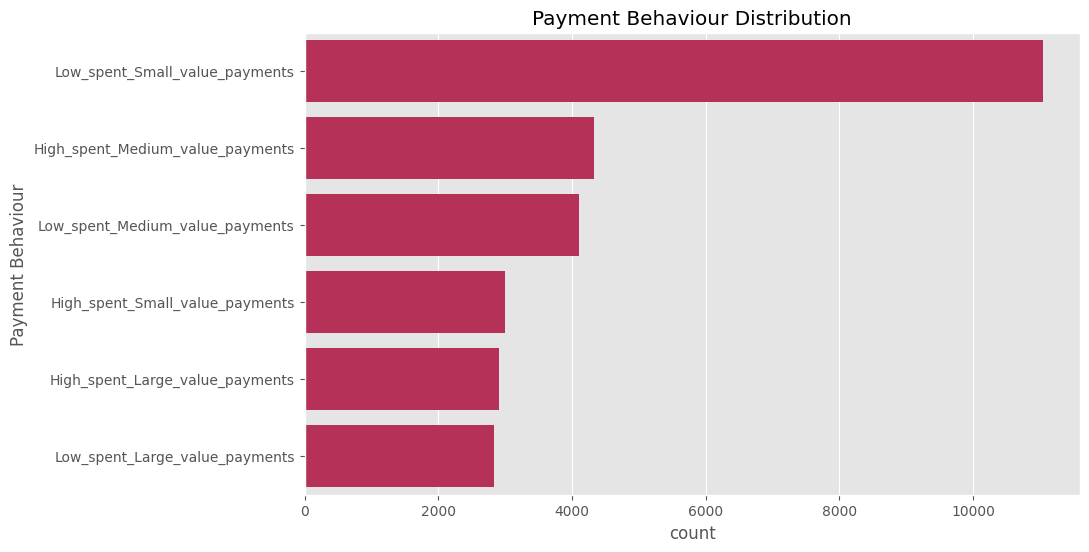

In [ ]:
def plot_payment_behaviour(df):
  payment_behaviour_values = df['Payment_Behaviour'].value_counts()
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, y='Payment_Behaviour', palette='rocket', order=payment_behaviour_values.index, hue='Credit_Score', legend=False)
  plt.title('Payment Behaviour Distribution')
  plt.ylabel('Payment Behaviour')

  total = len(df)
  for i in range(payment_behaviour_values.shape[0]):
    count = payment_behaviour_values.iloc[i]
    percentage = '{:.2f}%'.format(100 * count/total)
    y = i
    x = count + 400
    ax.annotate(percentage, (x, y), ha='center', va='center')

  plt.show()

plot_payment_behaviour(df_train)
plot_payment_behaviour(df_good)
plot_payment_behaviour(df_standard)
plot_payment_behaviour(df_bad)

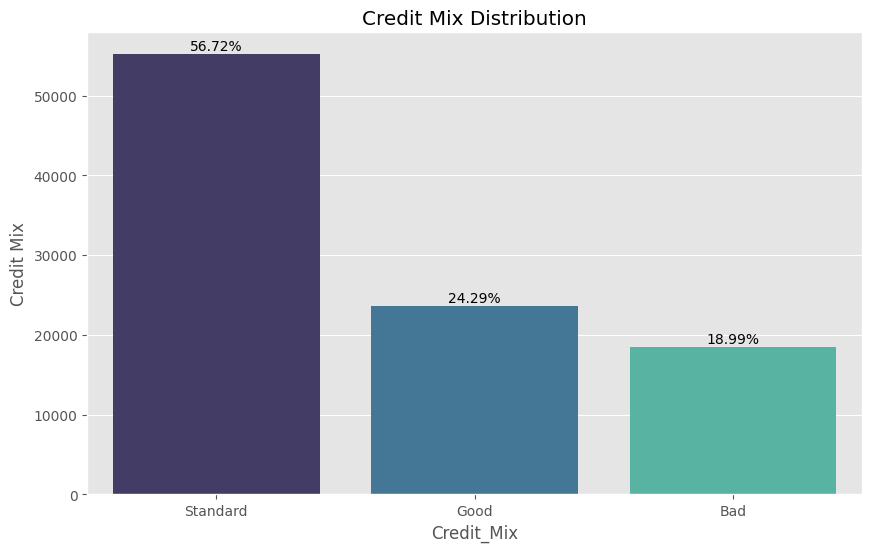

In [ ]:
credit_mix_values = df_train['Credit_Mix'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data = df_train, x = 'Credit_Mix', palette = 'mako', order = credit_mix_values.index, hue = 'Credit_Mix', legend = False)
plt.title('Credit Mix Distribution')
plt.ylabel('Credit Mix')

total = len(df_train)
for i in range(credit_mix_values.shape[0]):
  count = credit_mix_values.iloc[i]
  percentange = '{:.2f}%'.format(100 * count / total)
  x = i;
  y = count + 1000
  ax.annotate(percentange, (x, y), ha = 'center', va = 'center')

plt.show()

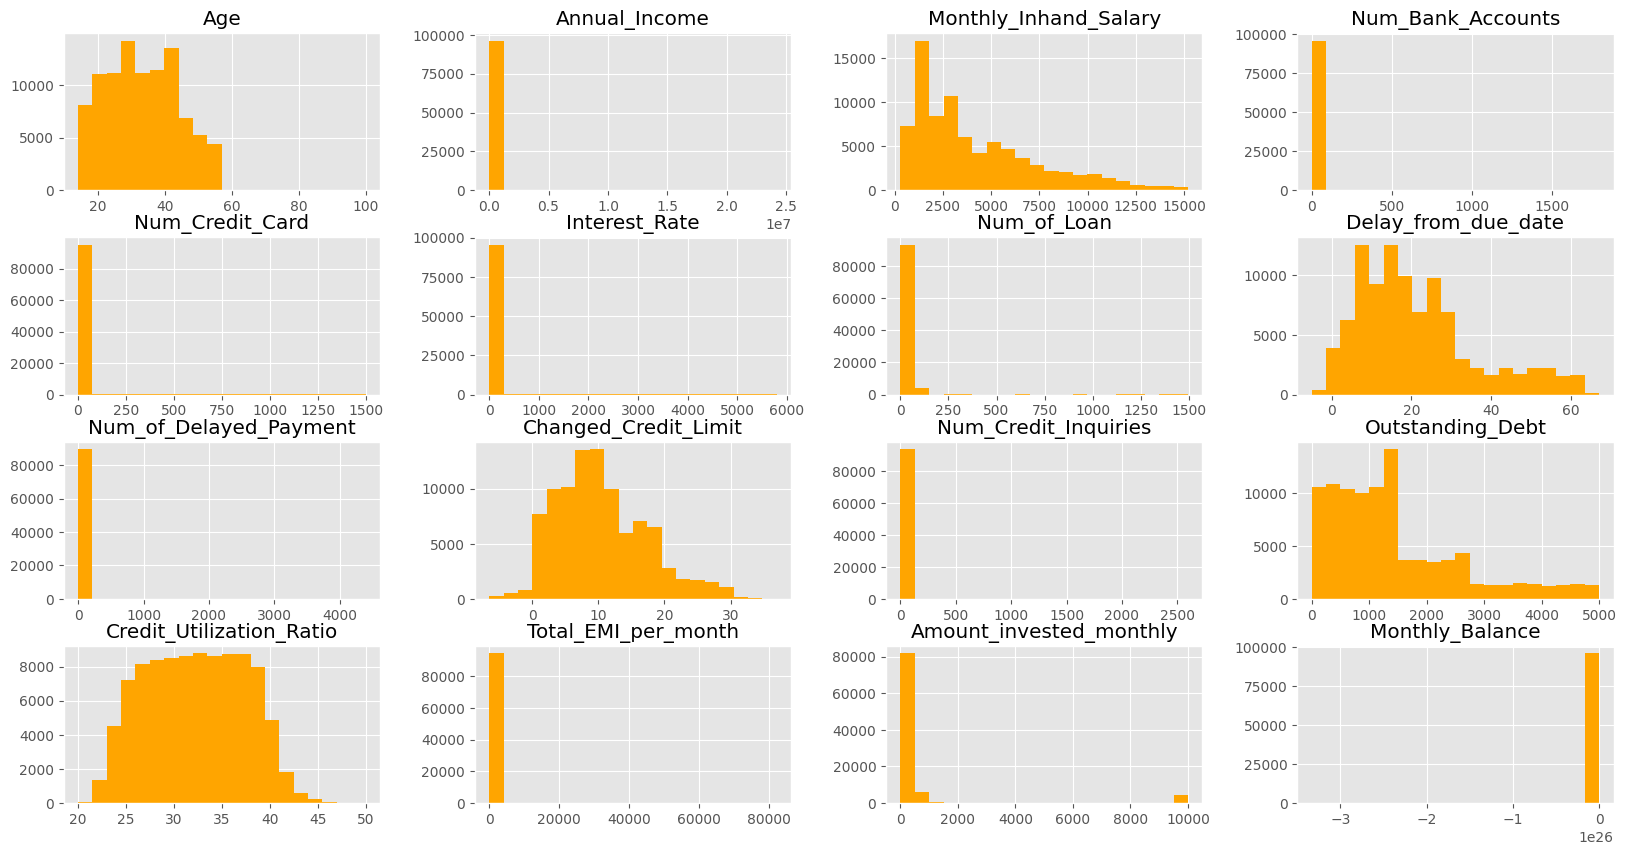

------------------------------------------------------------------------------------------------------------------------------------------------------


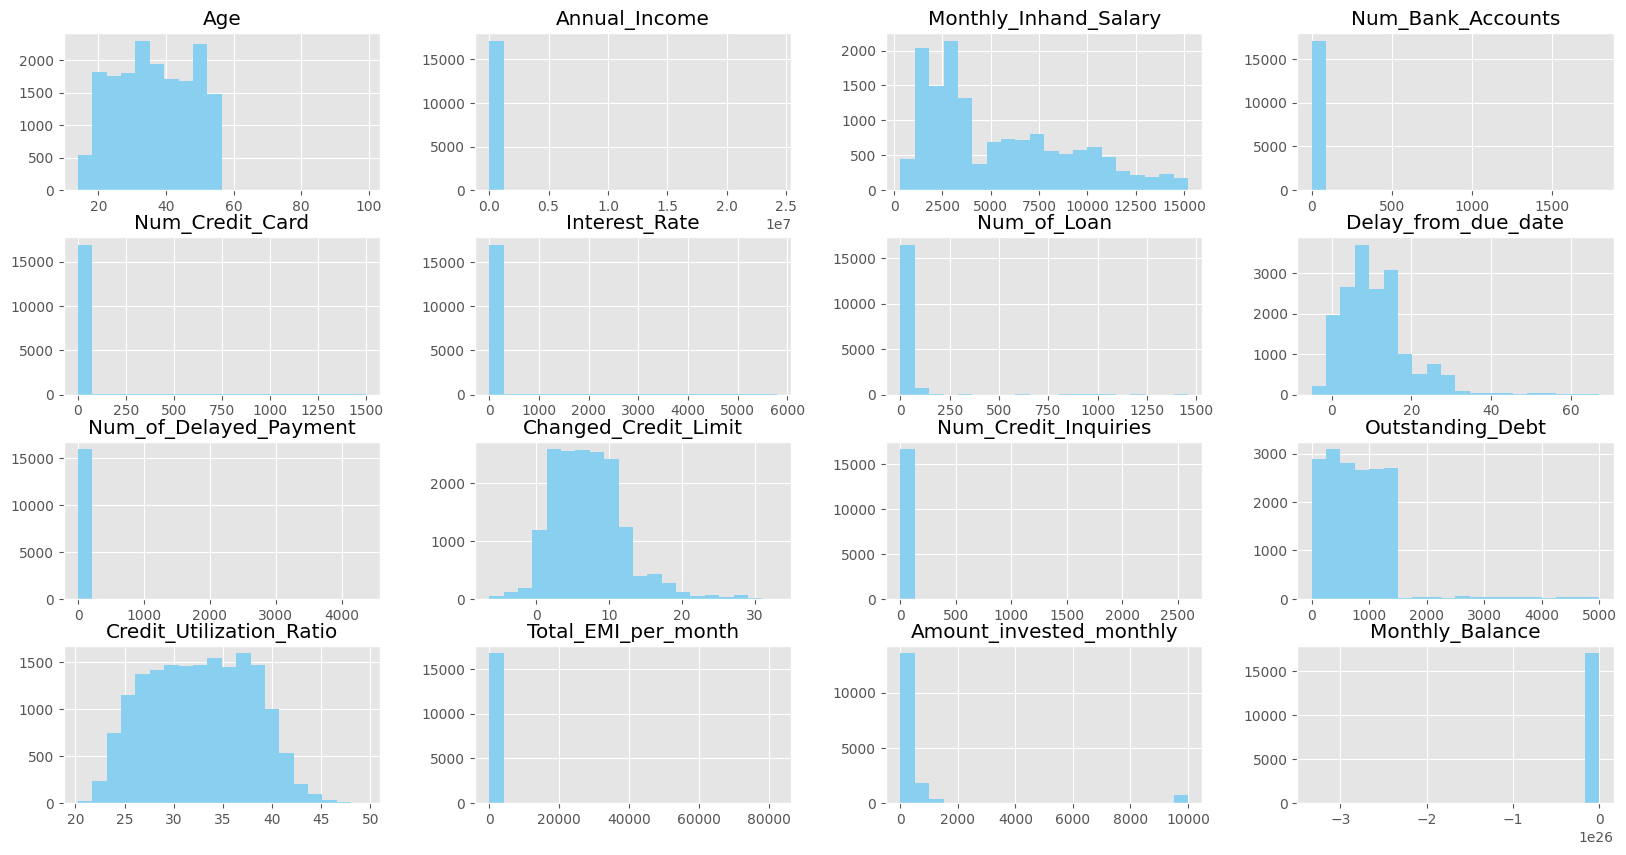

------------------------------------------------------------------------------------------------------------------------------------------------------


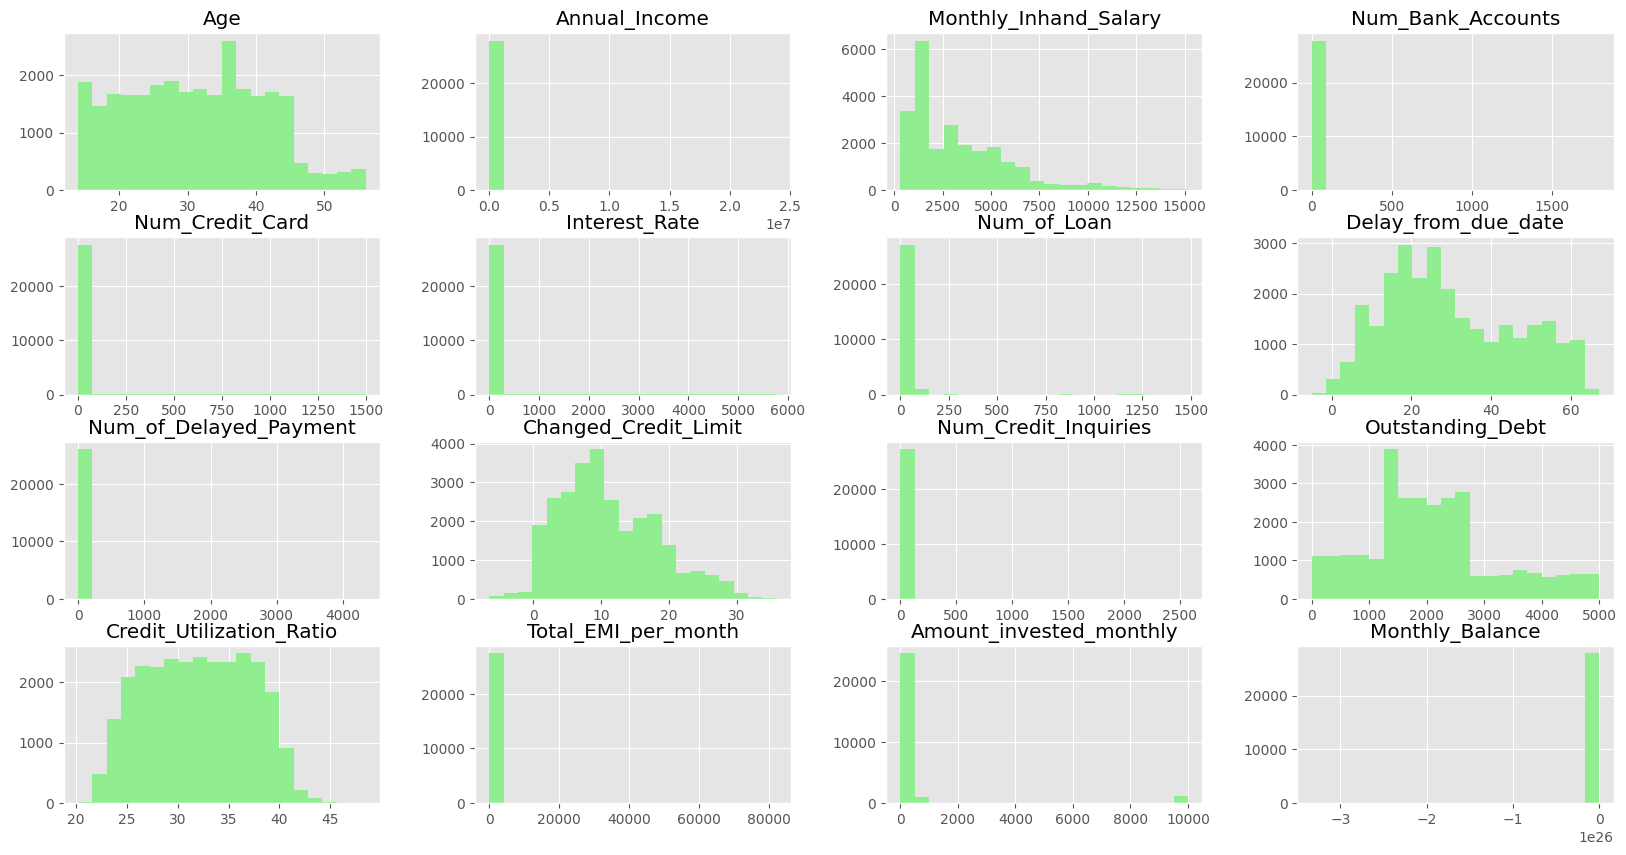

------------------------------------------------------------------------------------------------------------------------------------------------------


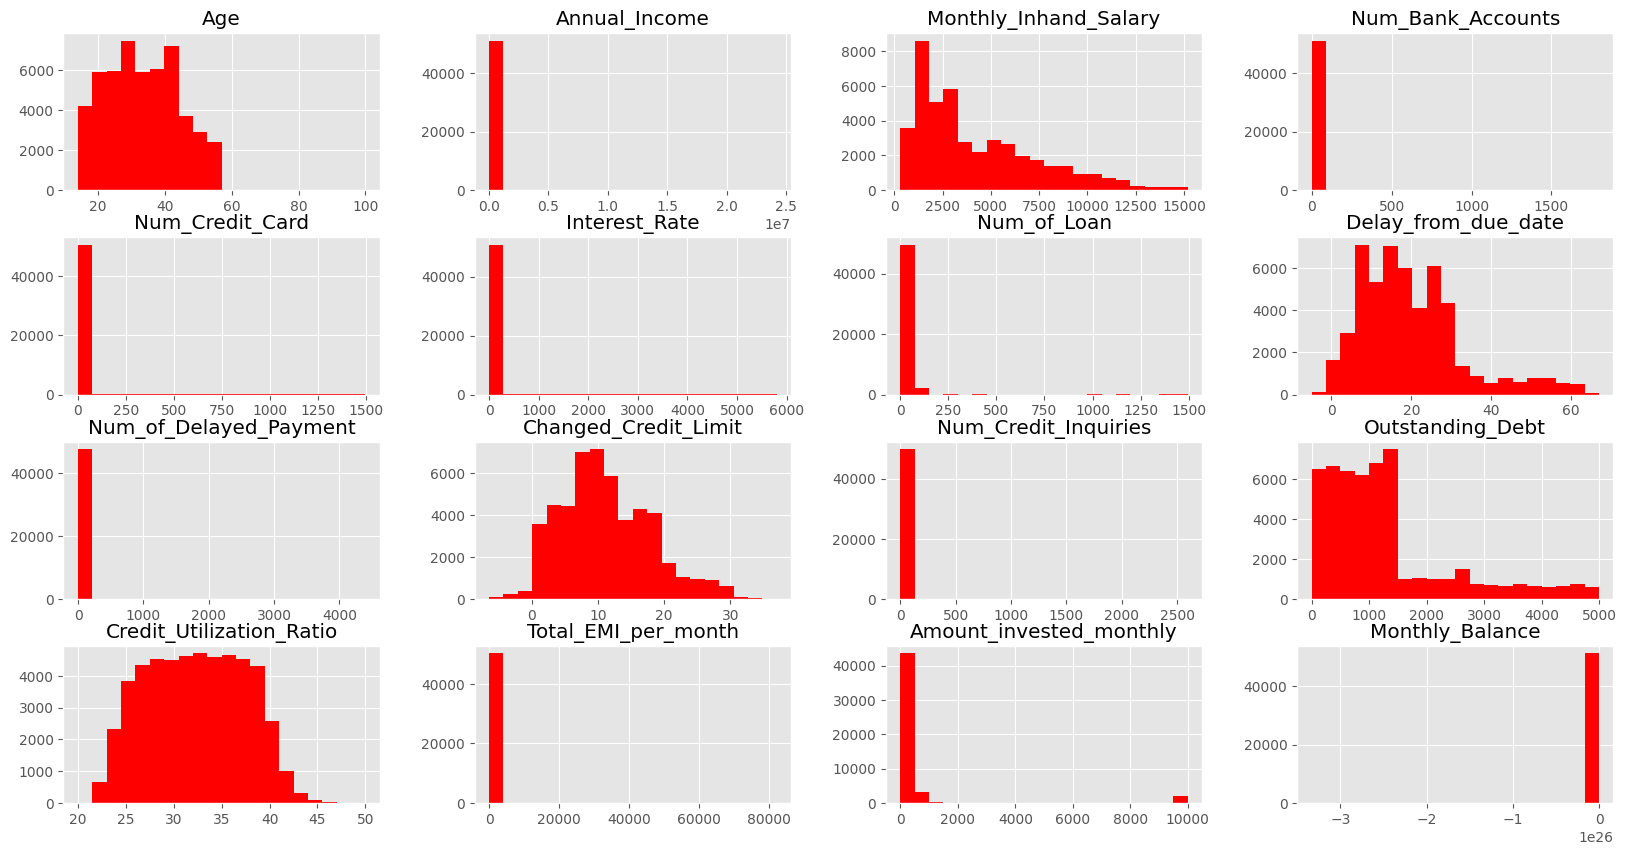

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
def plot_hist(df, color):
  df.hist(bins = 20, figsize = (20, 10), color = color)
  plt.show()
  print('-' * 150)

plot_hist(df_train, '#FFA500')
plot_hist(df_good, '#89CFF0')
plot_hist(df_bad, '#90EE90')
plot_hist(df_standard, '#FF0000')

In [ ]:
df = df_train[df_train['Outstanding_Debt'] <= 1500]
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,40137
Good,16833
Poor,9423


In [ ]:
df = df_train[df_train['Outstanding_Debt'] > 1500]
df['Credit_Score'].value_counts()

,count
Credit_Score,
Poor,18782
Standard,11587
Good,462


In [ ]:
df = df_train[df_train['Delay_from_due_date'] <= 10]
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,13619
Good,9427
Poor,3273


In [ ]:
df = df_train[df_train['Delay_from_due_date'] < 10]
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,11831
Good,8528
Poor,2777


In [ ]:
df = df_train[df_train['Monthly_Inhand_Salary'] > 7500]
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,7196
Good,4030
Poor,1687


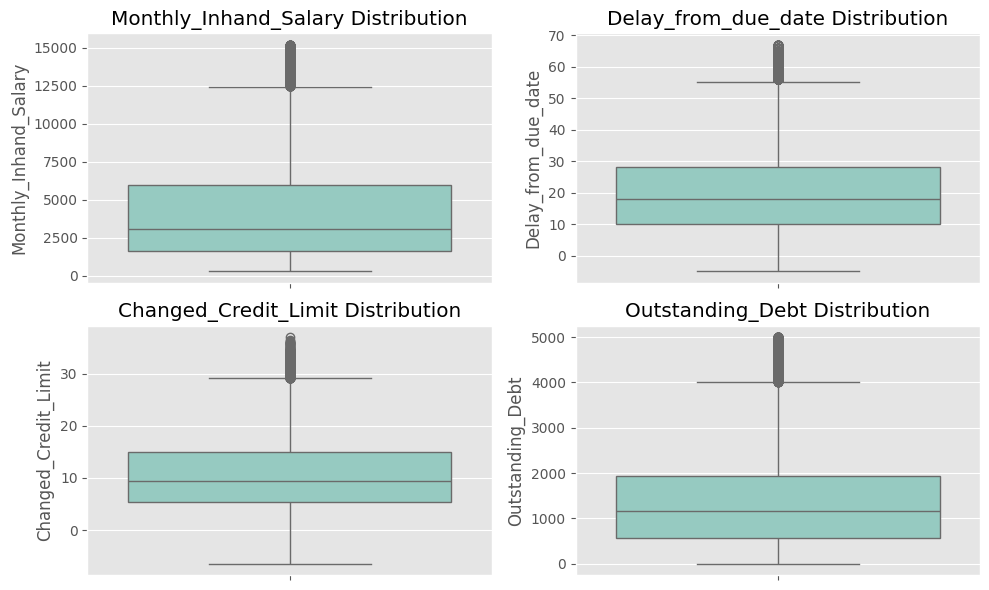

In [ ]:
cols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Outstanding_Debt']
sns.set_palette('Set3')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
  sns.boxplot(data=df_train, y=col, ax=axes[i])
  axes[i].set_title(f'{col} Distribution')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Bivariate Analysis

In [ ]:
def get_amount_invested_col(col):
    if col >= 0 or col <=3000 :
        return "0-3K"
    elif col > 3000 or col <=6000:
        return "0-6K"
    elif col > 6000 or col <=9000:
        return "0-9K"
    else:
        return ">9K"
df_train['Amount_invested_monthly_categ'] = df_train['Amount_invested_monthly'].apply(get_amount_invested_col)

In [ ]:
df_train['Amount_invested_monthly_categ'].value_counts()

,count
Amount_invested_monthly_categ,
0-3K,92880
>9K,4344


In [ ]:
pd.DataFrame(df_train.groupby(['Amount_invested_monthly_categ'])[['Credit_Score']].value_counts())

count
Amount_invested_monthly_categ Credit_Score       
0-3K                          Standard      49465
                              Poor          26911
                              Good          16504
>9K                           Standard       2259
                              Poor           1294
                              Good            791

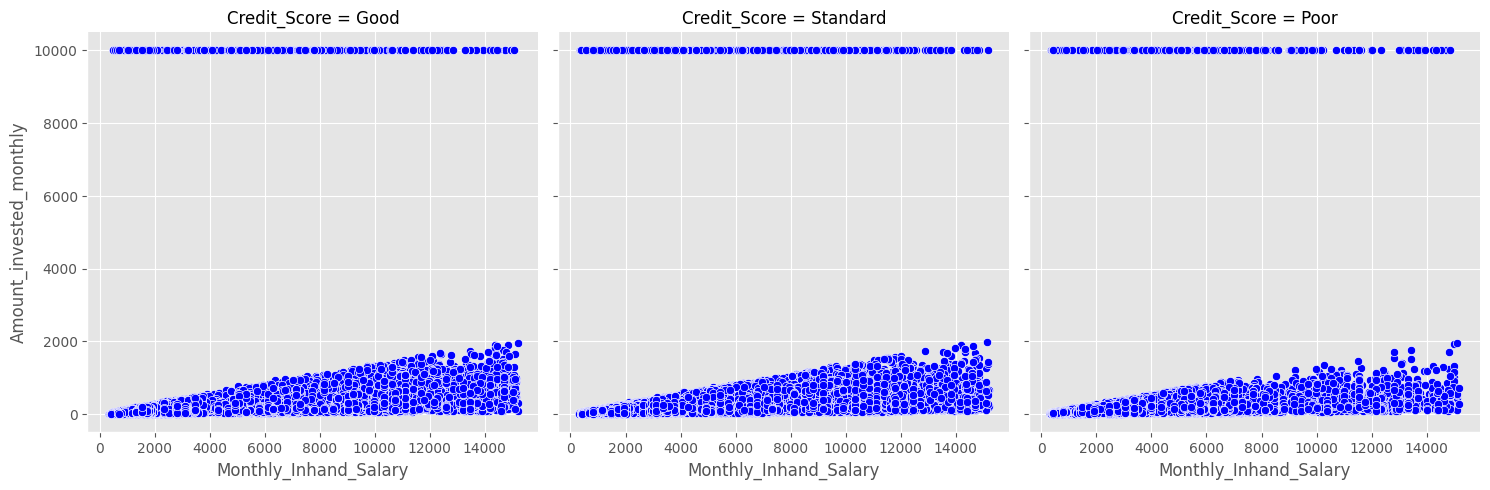

In [ ]:
sns.relplot(x='Monthly_Inhand_Salary', y='Amount_invested_monthly', data=df_train, kind='scatter', col='Credit_Score', col_wrap=3 , color ='blue')
plt.show()

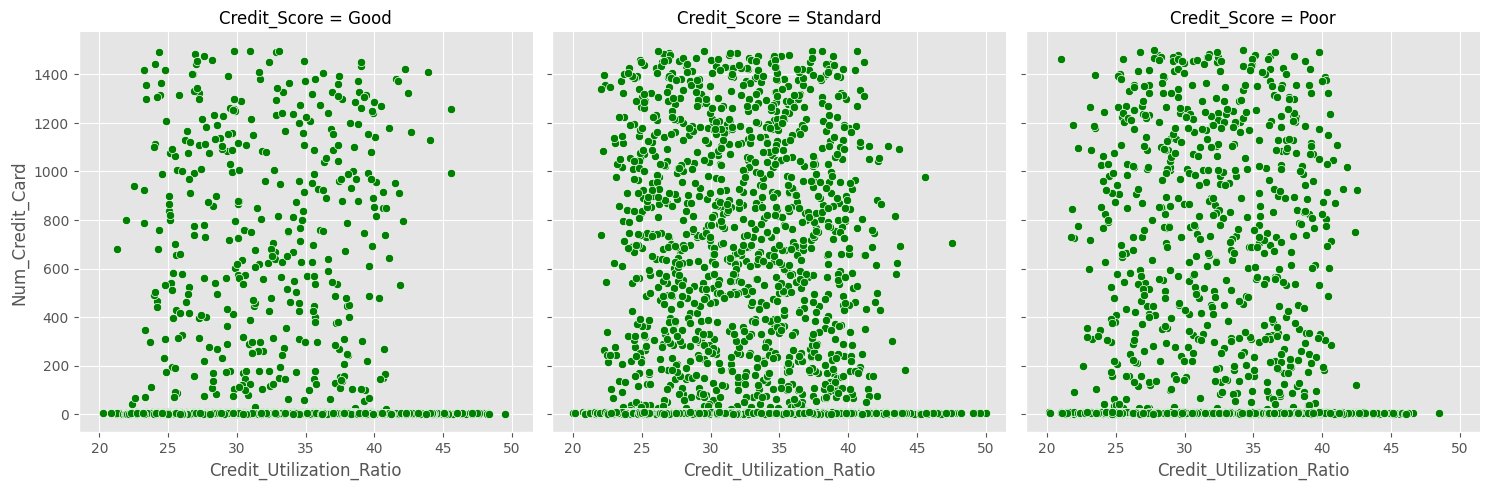

In [ ]:
sns.relplot(x='Credit_Utilization_Ratio', y='Num_Credit_Card', data=df_train, kind='scatter',
            col='Credit_Score', col_wrap=3 , color ='g')
plt.show()

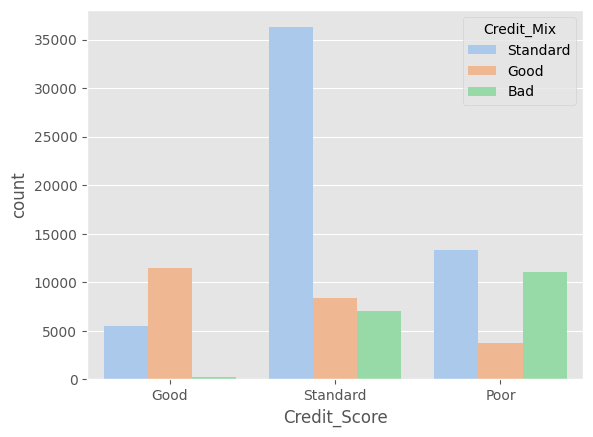

In [ ]:
sns.set_palette("pastel")
sns.countplot(data = df_train , x ='Credit_Score' , hue ='Credit_Mix' )
plt.show()

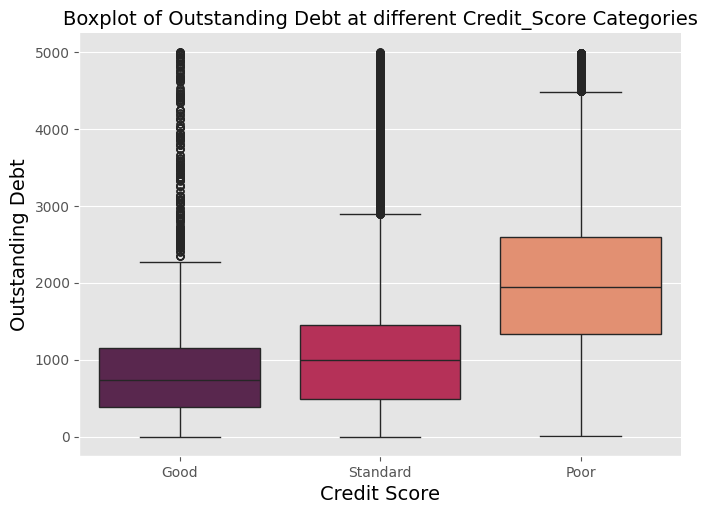

In [ ]:
sns.catplot(y='Outstanding_Debt', x='Credit_Score', data=df_train, kind='box', height=5, aspect=1.4,palette='rocket' , hue ='Credit_Score')
plt.title('Boxplot of Outstanding Debt at different Credit_Score Categories', fontsize=14, c='k')
plt.xlabel('Credit Score', fontsize=14, c='k')
plt.ylabel('Outstanding Debt', fontsize=14, c='k')
plt.show()

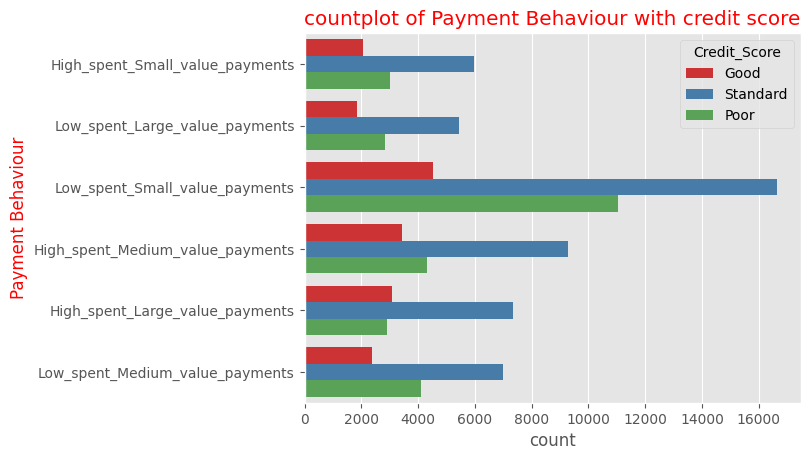

In [ ]:
sns.countplot(data = df_train , y = 'Payment_Behaviour' , hue ='Credit_Score' , palette='Set1')
plt.title("countplot of Payment Behaviour with credit score" , c = "r")
plt.ylabel('Payment Behaviour' , c ="r")
plt.show()

In [ ]:
df_train.groupby('Month')['Amount_invested_monthly'].sum()

,Amount_invested_monthly
Month,
April,7.344167e+06
August,7.409425e+06
February,7.146557e+06
January,7.434491e+06
July,7.316463e+06
June,7.424772e+06
March,7.570457e+06
May,7.459028e+06


In [ ]:
df_train.drop(['Month','Amount_invested_monthly_categ'], axis = 1 , inplace = True)
df_test.drop(['Month'], axis = 1 , inplace = True)

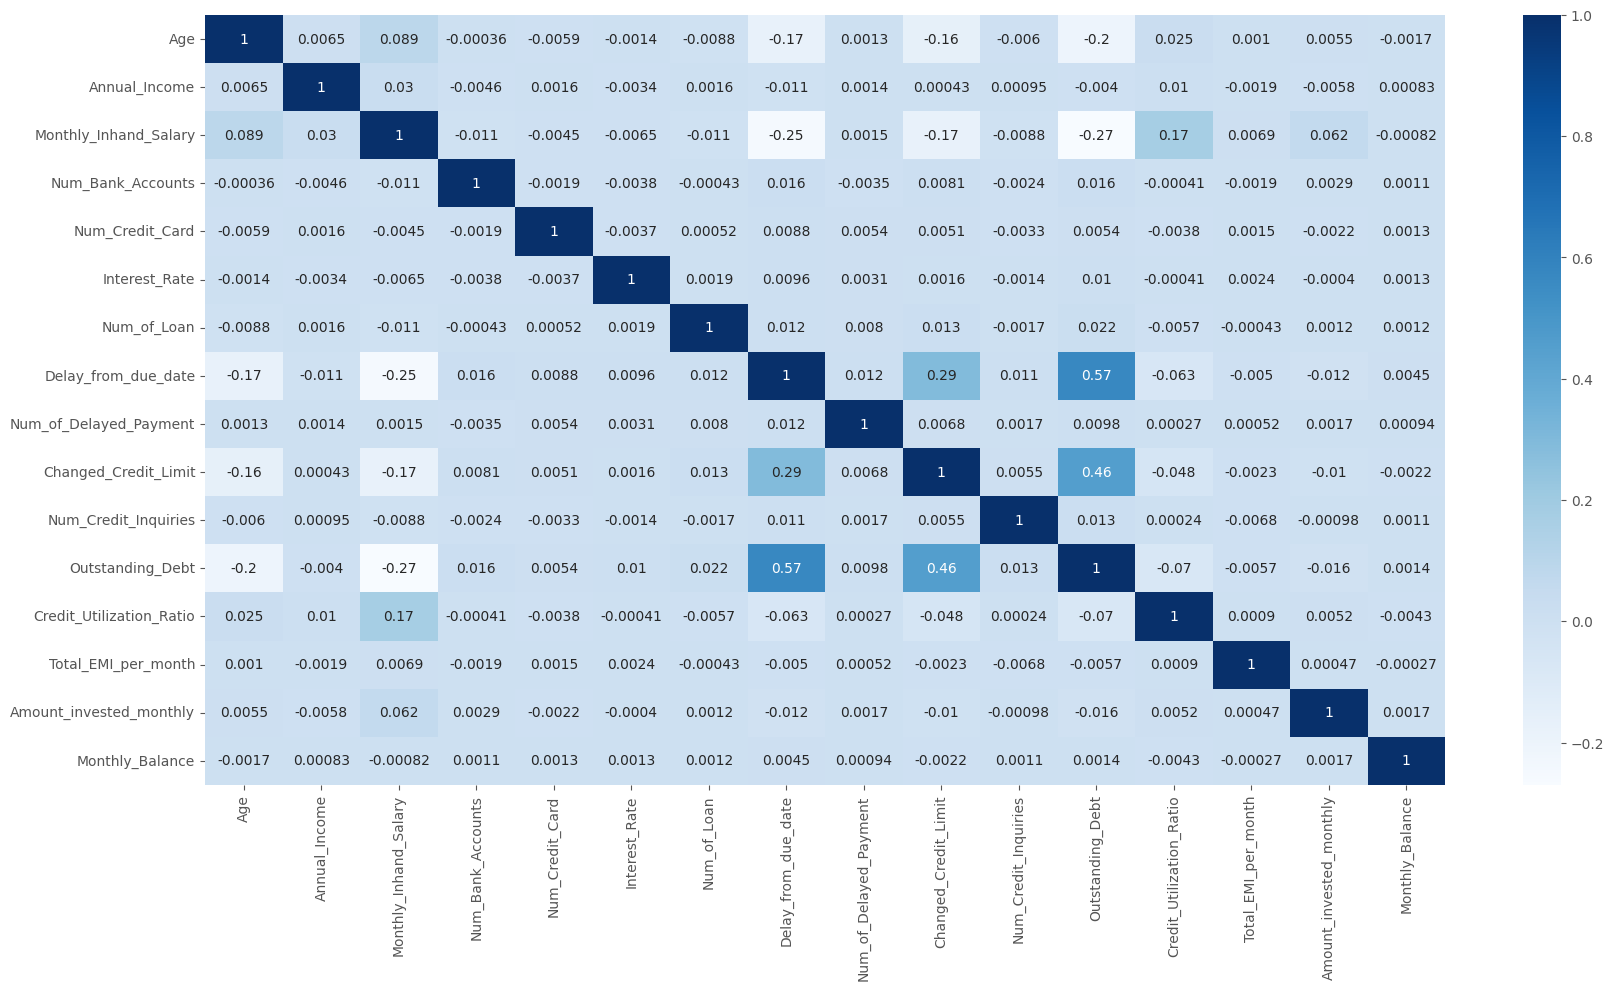

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.select_dtypes(include=['int64','float64']).corr(),annot=True , cmap ="Blues")
plt.show()

Dealing with categorical values

In [ ]:
df_train.select_dtypes(include = ['object'])

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Standard,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
5,Scientist,Good,No,Low_spent_Small_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,Standard,No,High_spent_Large_value_payments,Poor
99996,Mechanic,Standard,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


In [ ]:
lbl = LabelEncoder()
label_cols = ['Occupation', 'Payment_of_Min_Amount']
for col in label_cols:
  df_train[col] = lbl.fit_transform(df_train[col])
  df_test[col] = lbl.transform(df_test[col])

In [ ]:
ordinal = OrdinalEncoder();
ordinal_cols = ['Credit_Mix', 'Payment_Behaviour']
ordinal.fit(df_train[ordinal_cols])
df_train[ordinal_cols] = ordinal.transform(df_train[ordinal_cols])
df_test[ordinal_cols] = ordinal.transform(df_test[ordinal_cols])
df_train['Credit_Score'] = ordinal.fit_transform(df_train[['Credit_Score']])

In [ ]:
df_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,13,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,4.0,2.0,809.98,26.822620,0,49.574949,80.415295,2.0,312.494089,0.0
1,23.0,13,19114.12,NaN,3,4,3,4.0,-1,NaN,...,4.0,1.0,809.98,31.944960,0,49.574949,118.280222,3.0,284.629162,0.0
3,23.0,13,19114.12,NaN,3,4,3,4.0,5,4.0,...,4.0,1.0,809.98,31.377862,0,49.574949,199.458074,5.0,223.451310,0.0
4,23.0,13,19114.12,1824.843333,3,4,3,4.0,6,NaN,...,4.0,1.0,809.98,24.797347,0,49.574949,41.420153,1.0,341.489231,0.0
5,23.0,13,19114.12,NaN,3,4,3,4.0,8,4.0,...,4.0,1.0,809.98,27.262259,0,49.574949,62.430172,5.0,340.479212,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,3.0,2.0,502.38,34.663572,0,35.104023,60.971333,0.0,479.866228,1.0
99996,25.0,9,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,3.0,2.0,502.38,40.565631,0,35.104023,54.185950,1.0,496.651610,1.0
99997,25.0,9,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,3.0,1.0,502.38,41.255522,0,35.104023,24.028477,0.0,516.809083,1.0
99998,25.0,9,39628.99,3359.415833,4,6,7,2.0,20,NaN,...,3.0,1.0,502.38,33.638208,0,35.104023,251.672582,3.0,319.164979,2.0


Dealing with Missing Values

In [ ]:
df_train.isna().sum()[df_train.isna().sum() > 0]

,0
Monthly_Inhand_Salary,14597
Num_of_Delayed_Payment,6824
Changed_Credit_Limit,2037
Num_Credit_Inquiries,1906
Amount_invested_monthly,4344
Monthly_Balance,1179


In [ ]:
len = __builtins__.len
cnt = 0
length = len(df_train)
for i in range(length):
  if df_train.iloc[i]['Monthly_Inhand_Salary'] == np.nan:
    continue
  predicted = df_train.iloc[i]['Annual_Income'] / 12
  original = df_train.iloc[i]['Monthly_Inhand_Salary']
  percentage = 100 * (predicted - original) / predicted
  if percentage < 0:
    percentage = - percentage
  if percentage <= 10:
    cnt += 1
print(cnt/850)

75.45176470588235


75% of Monthly Inhand Salaries are approximately Annual Salarie / 12
Therefore we replace missing monthly inhand salary values by value of annual salary/12

In [ ]:
def fill_monthly_salaries(row):
  if np.isnan(row['Monthly_Inhand_Salary']):
    return row['Annual_Income'] / 12
  else:
    return row['Monthly_Inhand_Salary']

df_train['Monthly_Inhand_Salary'] = df_train.apply(fill_monthly_salaries, axis=1)
df_test['Monthly_Inhand_Salary'] = df_test.apply(fill_monthly_salaries, axis=1)

In [ ]:
missing_cols = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']
for col in missing_cols:
  col_median = df_train[col].median()
  df_train.fillna({col: col_median}, inplace = True)
  df_test.fillna({col: col_median}, inplace = True)

In [ ]:
df_train.isna().sum()[df_train.isna().sum() > 0]

,0


In [ ]:
df_train.shape

(97224, 21)

Handling Outliers

In [ ]:
# dropping outliers in rows
outlier_indices = detect_outliers(df_train, 0, df_train.columns)
len(outlier_indices)

38665

In [ ]:
df_train.drop(outlier_indices, inplace = True)
df_train.shape

(58559, 21)

In [ ]:
# drooping outliers in columns
for col in df_train.columns:
  outlier_indices = detect_outliers(df_train, 0, [col])
  col_median = df_train[col].median()
  df_train.loc[outlier_indices, col] = col_median

Splitting the dataset and handling Imbalanced Classes

In [ ]:
x = df_train.drop('Credit_Score', axis = 1)
y = df_train['Credit_Score']
y.value_counts()

,count
Credit_Score,
2.0,31889
1.0,16978
0.0,9692


In [ ]:
smote = SMOTE()
x, y = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True, random_state = 24, stratify = y)
y.value_counts()

,count
Credit_Score,
0.0,31889
2.0,31889
1.0,31889


In [ ]:
print('x_train shape -- ', x_train.shape)
print('y_train shape -- ', y_train.shape)
print('x_test shape -- ', x_test.shape)
print('y_test shape -- ', y_test.shape)

x_train shape --  (86100, 20)
y_train shape --  (86100,)
x_test shape --  (9567, 20)
y_test shape --  (9567,)


Scaling the Data

In [ ]:
pip = Pipeline([
    ('scaler', StandardScaler())
])
x_train_final = pip.fit_transform(x_train)
x_test_final = pip.transform(x_test)

print('x_train shape -- ', x_train_final.shape)
print('y_train shape -- ', y_train.shape)
print('x_test shape -- ', x_test_final.shape)
print('y_test shape -- ', y_test.shape)
y_train.value_counts()

x_train shape --  (86100, 20)
y_train shape --  (86100,)
x_test shape --  (9567, 20)
y_test shape --  (9567,)


,count
Credit_Score,
1.0,28700
0.0,28700
2.0,28700


Building ML Models

In [ ]:
models = {
    'OvO' : OneVsOneClassifier(estimator=RandomForestClassifier()),
    'SGD' : SGDClassifier(),
    'LGR' : LogisticRegression(),
    'XGB' : xgb.XGBClassifier(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'BAG' : BaggingClassifier()
}

For OvO Model
Train Score is 1.0
Test Score is 0.8727918887843629
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      3189
         1.0       0.88      0.89      0.89      3189
         2.0       0.86      0.79      0.82      3189

    accuracy                           0.87      9567
   macro avg       0.87      0.87      0.87      9567
weighted avg       0.87      0.87      0.87      9567



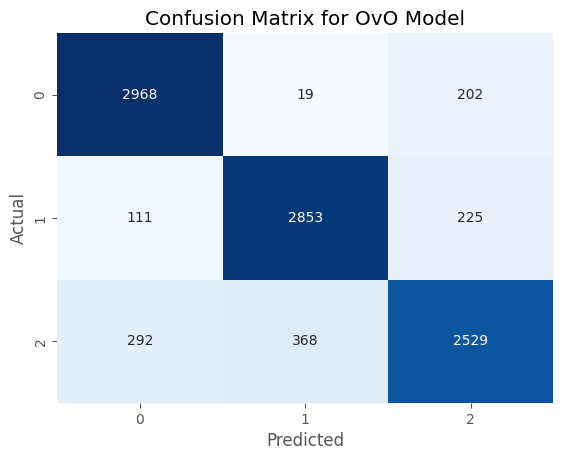

------------------------------------------------------------------------------------------------------------------------------------------------------
For SGD Model
Train Score is 0.7127293844367015
Test Score is 0.7191387059684331
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77      3189
         1.0       0.74      0.72      0.73      3189
         2.0       0.74      0.55      0.63      3189

    accuracy                           0.72      9567
   macro avg       0.72      0.72      0.71      9567
weighted avg       0.72      0.72      0.71      9567



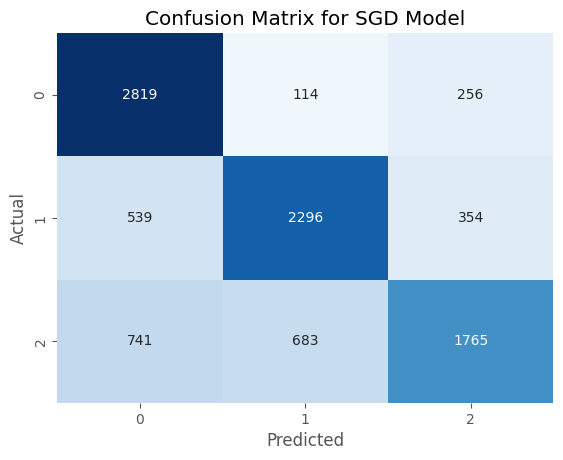

------------------------------------------------------------------------------------------------------------------------------------------------------
For LGR Model
Train Score is 0.7147154471544716
Test Score is 0.7244695306783736
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77      3189
         1.0       0.78      0.71      0.74      3189
         2.0       0.70      0.61      0.65      3189

    accuracy                           0.72      9567
   macro avg       0.73      0.72      0.72      9567
weighted avg       0.73      0.72      0.72      9567



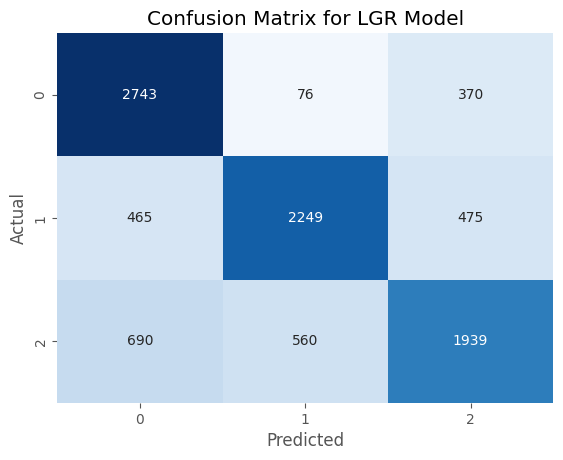

------------------------------------------------------------------------------------------------------------------------------------------------------
For XGB Model
Train Score is 0.8804065040650406
Test Score is 0.8487509146022787
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      3189
         1.0       0.87      0.84      0.85      3189
         2.0       0.81      0.80      0.81      3189

    accuracy                           0.85      9567
   macro avg       0.85      0.85      0.85      9567
weighted avg       0.85      0.85      0.85      9567



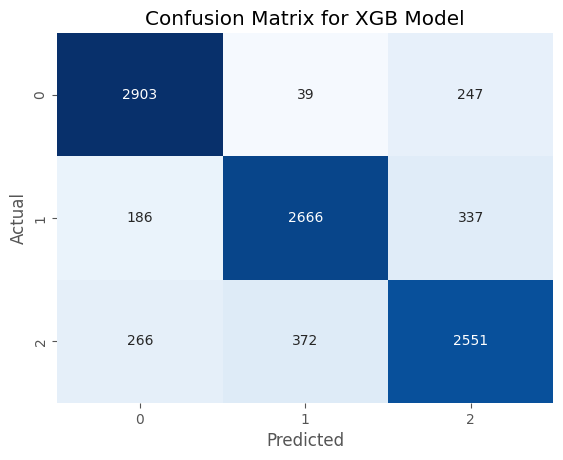

------------------------------------------------------------------------------------------------------------------------------------------------------
For DT Model
Train Score is 1.0
Test Score is 0.7889620570711822
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      3189
         1.0       0.80      0.79      0.79      3189
         2.0       0.74      0.74      0.74      3189

    accuracy                           0.79      9567
   macro avg       0.79      0.79      0.79      9567
weighted avg       0.79      0.79      0.79      9567



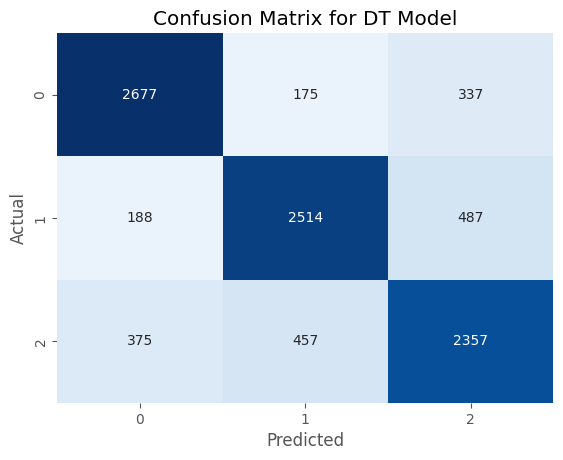

------------------------------------------------------------------------------------------------------------------------------------------------------
For RF Model
Train Score is 1.0
Test Score is 0.8715375770879064
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      3189
         1.0       0.88      0.89      0.88      3189
         2.0       0.86      0.79      0.83      3189

    accuracy                           0.87      9567
   macro avg       0.87      0.87      0.87      9567
weighted avg       0.87      0.87      0.87      9567



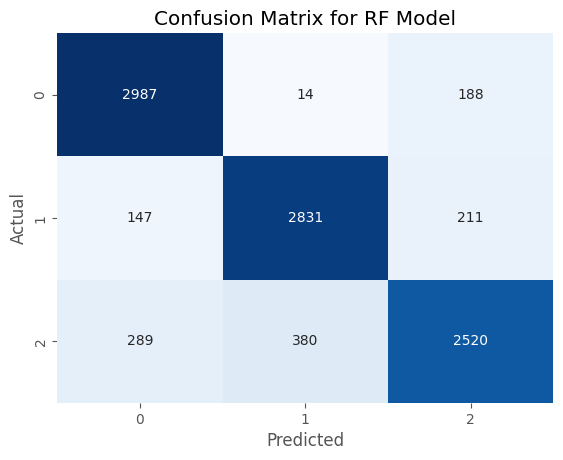

------------------------------------------------------------------------------------------------------------------------------------------------------
For BAG Model
Train Score is 0.9891173054587689
Test Score is 0.840911466499425
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      3189
         1.0       0.86      0.86      0.86      3189
         2.0       0.83      0.76      0.79      3189

    accuracy                           0.84      9567
   macro avg       0.84      0.84      0.84      9567
weighted avg       0.84      0.84      0.84      9567



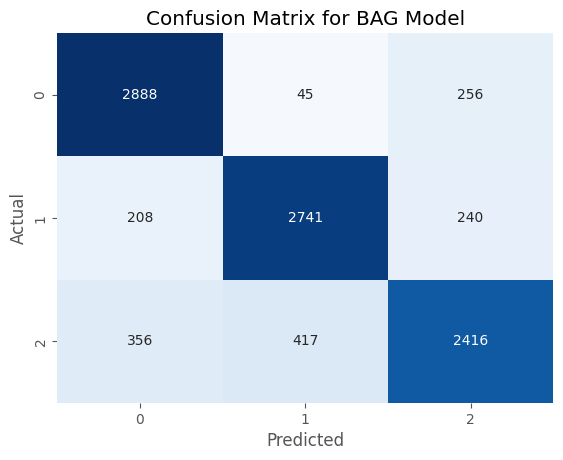

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for key, model in models.items():
  print(f'For {key} Model')

  model.fit(x_train_final, y_train)
  y_pred = model.predict(x_test_final)
  train_accuracy = accuracy_score(y_train, model.predict(x_train_final))
  test_accuracy = accuracy_score(y_test, y_pred)

  print(f'Train Score is {train_accuracy}')
  print(f'Test Score is {test_accuracy}')
  print(classification_report(y_test, y_pred))

  confusion_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_mat, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
  plt.title(f'Confusion Matrix for {key} Model')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  print('-' * 150)

Among all the model, XGBoost performs the best without overfitting.

Now we will analyse XGBoost

Training a new XGBoost Model

Train Score is 0.8804065040650406
Test Score is 0.8487509146022787
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      3189
         1.0       0.87      0.84      0.85      3189
         2.0       0.81      0.80      0.81      3189

    accuracy                           0.85      9567
   macro avg       0.85      0.85      0.85      9567
weighted avg       0.85      0.85      0.85      9567



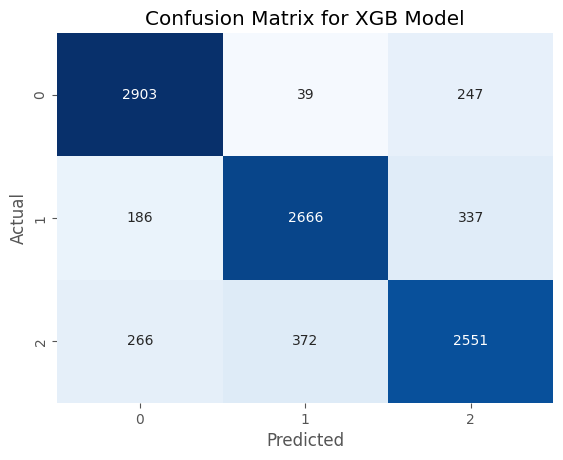

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
model = xgb.XGBClassifier()

model.fit(x_train_final, y_train)
y_pred = model.predict(x_test_final)
train_accuracy = accuracy_score(y_train, model.predict(x_train_final))
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Train Score is {train_accuracy}')
print(f'Test Score is {test_accuracy}')
print(classification_report(y_test, y_pred))

confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.title(f'Confusion Matrix for XGB Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('-' * 150)

Visualizing Importance of features

[0.00930381 0.00902643 0.01098547 0.01109963 0.02012702 0.03740104
 0.09534965 0.0145632  0.01543782 0.01603031 0.01159667 0.01611404
 0.20321865 0.06325526 0.00497174 0.377114   0.01010097 0.00611798
 0.06282049 0.0053658 ]


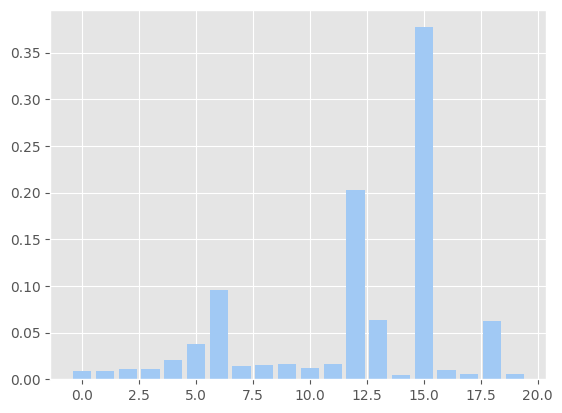

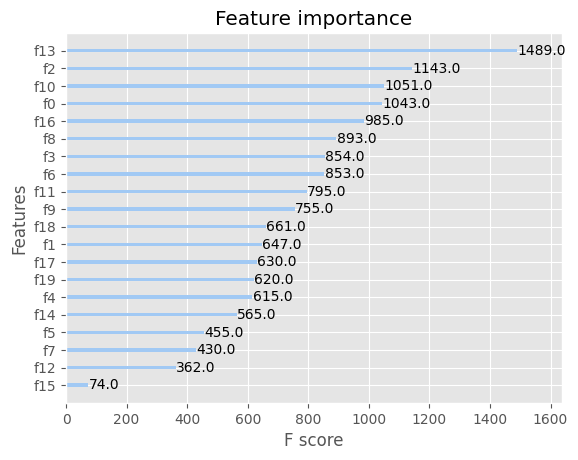

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,13,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,2.0,809.98,26.822620,0,49.574949,80.415295,2.0,312.494089
1,23.0,13,19114.12,1592.843333,3,4,3,4.0,-1,14.0,11.27,4.0,1.0,809.98,31.944960,0,49.574949,118.280222,3.0,284.629162
2,23.0,13,19114.12,1592.843333,3,4,3,4.0,5,4.0,6.27,4.0,1.0,809.98,31.377862,0,49.574949,199.458074,5.0,223.451310
3,23.0,13,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,1.0,809.98,24.797347,0,49.574949,41.420153,1.0,341.489231
4,23.0,13,19114.12,1592.843333,3,4,3,4.0,8,4.0,9.27,4.0,1.0,809.98,27.262259,0,49.574949,62.430172,5.0,340.479212


In [ ]:
print(model.feature_importances_)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
plot_importance(model)
plt.show()
x.head()

In [ ]:
importances = model.feature_importances_

top_indices = importances.argsort()[-5:][::-1]
top_features = df_train.columns[top_indices]

print("Top 5 features:")
for feature in top_features:
    print(feature)

Top 5 features:
Payment_of_Min_Amount
Credit_Mix
Interest_Rate
Outstanding_Debt
Payment_Behaviour


Running XGBoost on features sorted with importances

In [ ]:
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
  selection = SelectFromModel(model, threshold = thresh, prefit = True)
  x_train_temp = selection.transform(x_train_final)
  model_temp = xgb.XGBClassifier()
  model_temp.fit(x_train_temp, y_train)
  x_test_temp = selection.transform(x_test_final)
  y_pred_temp = model_temp.predict(x_test_temp)
  accuracy = accuracy_score(y_test, y_pred_temp)
  print("Thresh=%.5f, n=%d, Accuracy: %.5f%%" % (thresh, x_train_temp.shape[1], accuracy*100.0))

Thresh=0.00497, n=20, Accuracy: 84.87509%
Thresh=0.00537, n=19, Accuracy: 84.83328%
Thresh=0.00612, n=18, Accuracy: 85.03188%
Thresh=0.00903, n=17, Accuracy: 85.26184%
Thresh=0.00930, n=16, Accuracy: 84.77057%
Thresh=0.01010, n=15, Accuracy: 84.92735%
Thresh=0.01099, n=14, Accuracy: 84.58242%
Thresh=0.01110, n=13, Accuracy: 84.34201%
Thresh=0.01160, n=12, Accuracy: 83.16087%
Thresh=0.01456, n=11, Accuracy: 83.32811%
Thresh=0.01544, n=10, Accuracy: 82.43964%
Thresh=0.01603, n=9, Accuracy: 81.39438%
Thresh=0.01611, n=8, Accuracy: 81.79158%
Thresh=0.02013, n=7, Accuracy: 80.99718%
Thresh=0.03740, n=6, Accuracy: 79.98328%
Thresh=0.06282, n=5, Accuracy: 78.54082%
Thresh=0.06326, n=4, Accuracy: 76.52347%
Thresh=0.09535, n=3, Accuracy: 72.76053%
Thresh=0.20322, n=2, Accuracy: 66.26947%
Thresh=0.37711, n=1, Accuracy: 54.01902%


We can see using the top 17 variables gives the best score, therefore we will use them and feed them to our ANN

Preparing Data for our ANN

In [ ]:
all_features = np.array(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
                         'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                         'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                         'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
                         'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
                         'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
                         'Monthly_Balance'], dtype='object')
best_selection = SelectFromModel(model, threshold = thresholds[3], prefit = True)
best_features_indices = best_selection.get_support(indices = True)
best_features = all_features[best_features_indices]
best_features

array(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour'], dtype=object)

In [ ]:
x_ann = x[best_features]
y_ann = y
x_ann.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour
0,23.0,13,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,2.0,809.98,0,49.574949,2.0
1,23.0,13,19114.12,1592.843333,3,4,3,4.0,-1,14.0,11.27,4.0,1.0,809.98,0,49.574949,3.0
2,23.0,13,19114.12,1592.843333,3,4,3,4.0,5,4.0,6.27,4.0,1.0,809.98,0,49.574949,5.0
3,23.0,13,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,1.0,809.98,0,49.574949,1.0
4,23.0,13,19114.12,1592.843333,3,4,3,4.0,8,4.0,9.27,4.0,1.0,809.98,0,49.574949,5.0


In [ ]:
x_train_ann, x_test_ann, y_train_ann, y_test_ann = train_test_split(x_ann, y_ann, test_size = 0.1, shuffle = True, random_state = 24, stratify = y_ann)
pip = Pipeline([
    ('scaler', StandardScaler())
])
x_train_final_ann = pip.fit_transform(x_train_ann)
x_test_final_ann = pip.transform(x_test_ann)

print('x_train_ann shape -- ', x_train_final_ann.shape)
print('y_train_ann shape -- ', y_train_ann.shape)
print('x_test_ann shape -- ', x_test_final_ann.shape)
print('y_test_ann shape -- ', y_test_ann.shape)
y_train_ann.value_counts()

x_train_ann shape --  (86100, 17)
y_train_ann shape --  (86100,)
x_test_ann shape --  (9567, 17)
y_test_ann shape --  (9567,)


,count
Credit_Score,
1.0,28700
0.0,28700
2.0,28700


Building ANN Model

In [ ]:
input_shape = x_train_final_ann.shape[1]

model = Sequential()

model.add(Dense(512, input_shape = (input_shape,), activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 100, restore_best_weights = True)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,555 (1.83 MB)

 Trainable params: 479,555 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x = x_train_final_ann, y = y_train_ann, validation_data = (x_test_final_ann, y_test_ann), batch_size = 512, epochs = 10000, verbose = 1, callbacks = [early_stopping])

Epoch 1/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5895 - loss: 0.8841 - val_accuracy: 0.7543 - val_loss: 0.6691
Epoch 2/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7366 - loss: 0.6996 - val_accuracy: 0.7588 - val_loss: 0.6489
Epoch 3/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7448 - loss: 0.6730 - val_accuracy: 0.7623 - val_loss: 0.6479
Epoch 4/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7486 - loss: 0.6604 - val_accuracy: 0.7658 - val_loss: 0.6216
Epoch 5/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7511 - loss: 0.6482 - val_accuracy: 0.7648 - val_loss: 0.6216
Epoch 6/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7566 - loss: 0.6405 - val_accuracy: 0.7727 - val_loss: 0.6138
Epoch 7/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7546 - loss: 0.6358 - val_accuracy: 0.7709 - val_loss: 0.6074
Epoch 8/10000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7570 - loss:

In [ ]:
model.evaluate(x_train_final_ann, y_train_ann)

2691/2691 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9406 - loss: 0.1737


[0.17184282839298248, 0.9414750337600708]

In [ ]:
model.evaluate(x_test_final_ann, y_test_ann)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8771 - loss: 0.3640


[0.34740394353866577, 0.8825128078460693]

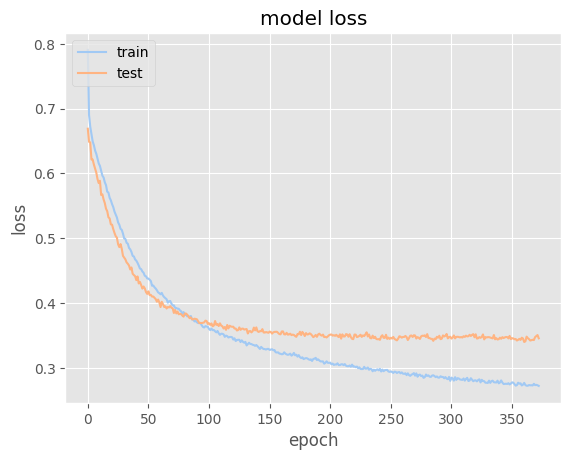

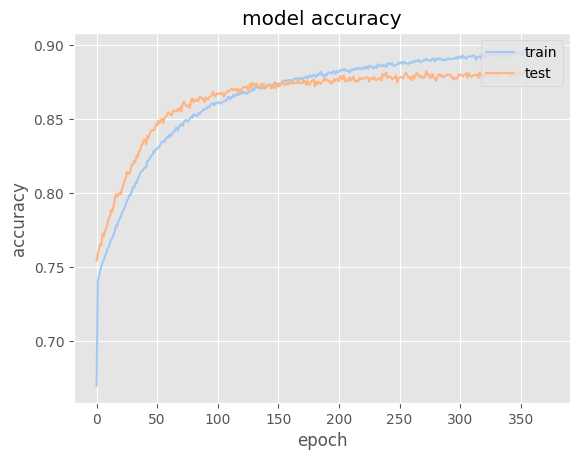

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()